# Wine Quality Final Project
## Dataset Introduction
Wine Quality dataset.

- **Published** 10/6/2009
- **Domain:** Portuguese "Vinho Verde" wines (red and white) from the north of Portugal
- **Number of instances:** 4,898
- **Number of features:** 11 (physicochemical inputs) + 1 output quality score

### Dataset Information
Two datasets are included, related to red and white "Vinho Verde" wine samples from the north of Portugal.

### Original Statement 

Due to privacy and logistic issues, only physicochemical and sensory variables are available, there is no data about grape types, wine brand, or wine selling price.

These datasets can be viewed as **classification** or **regression** tasks. The quality scores are ordered and not balanced there are many more “normal” wines than excellent or poor ones by design of the publisher.

### Real‑World Possible Usage 

If we could collect or scrape similar wine data for producers in Colorado, we could apply the same kind of modeling to support decisions in a market that was already about **$3.91 billion in 2022**. In a real application, we would want to add variables that are not available in the original dataset, such as grape type, region within Colorado, brand, and price point. 

With those additional features, we could:
- Predict quality ratings for new or existing Colorado wines.
- Explore which factors (e.g., acidity, alcohol content, grape variety) are most strongly associated with higher quality.
- Help wineries position their products or adjust production choices based on data‑driven insights.

In [17]:
# Fetch the Wine Quality dataset from the UCI ML Repository
from ucimlrepo import fetch_ucirepo
import os
import pandas as pd

# Create local data directory if it does not exist
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)

# Fetch dataset by UCI ID (186 = Wine Quality)
wine_quality = fetch_ucirepo(id=186)

# Data as pandas DataFrames
X = wine_quality.data.features  # 11 physicochemical input features
y = wine_quality.data.targets   # quality score (output)

# Inspect metadata and variable information (optional)
print("Metadata:\n", wine_quality.metadata)
print("\nVariables:\n", wine_quality.variables)

# Save to CSV files in ./data
features_path = os.path.join(data_dir, "wine_quality_features.csv")
targets_path = os.path.join(data_dir, "wine_quality_targets.csv")

X.to_csv(features_path, index=False)
y.to_csv(targets_path, index=False)

print(f"Saved features to: {features_path}")
print(f"Saved targets to: {targets_path}")

Metadata:
 {'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine 

## Citations
- Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.
- WineAmerica. (2022). *Economic Impact Study: Colorado Wine Industry*. https://wineamerica.org/economic-impact-study/colorado-wine-industry/

## Exploratory Data Analysis (EDA)
In this section, we load the prepared wine quality dataset from the local `data` folder, inspect its structure, and explore basic distributions of the variables and the quality scores.

In [18]:
# Load combined features and target into a single DataFrame
import pandas as pd

features_path = "data/wine_quality_features.csv"
targets_path = "data/wine_quality_targets.csv"

X = pd.read_csv(features_path)
y = pd.read_csv(targets_path)

# Assume the first column in y is the quality score
target_col = y.columns[0]

df = X.copy()
df[target_col] = y[target_col]

print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and non-null counts:")
display(df.info())

print("\nQuality value counts:")
display(df[target_col].value_counts().sort_index())

Data shape: (6497, 12)
Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First 5 rows:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


None


Quality value counts:


quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

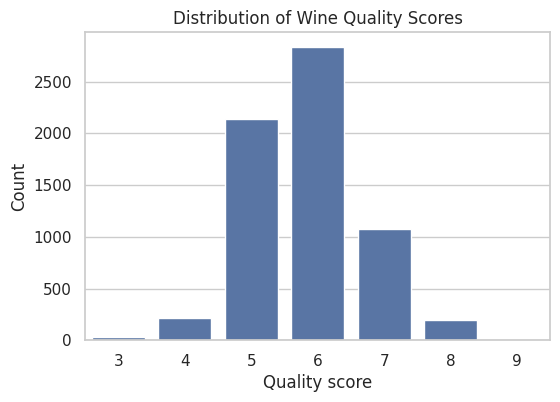

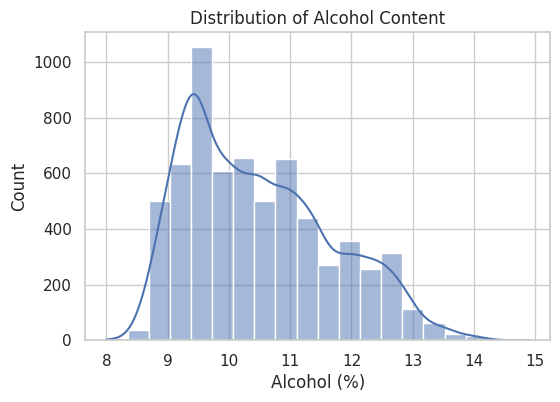

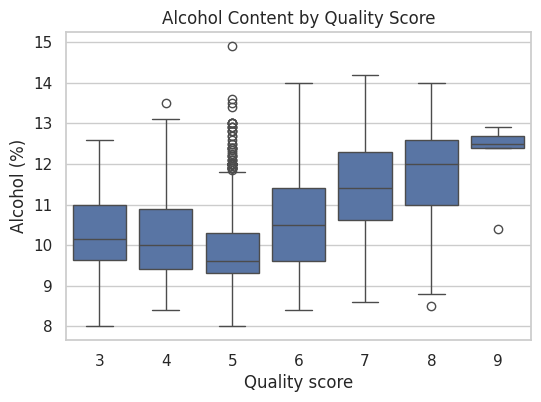

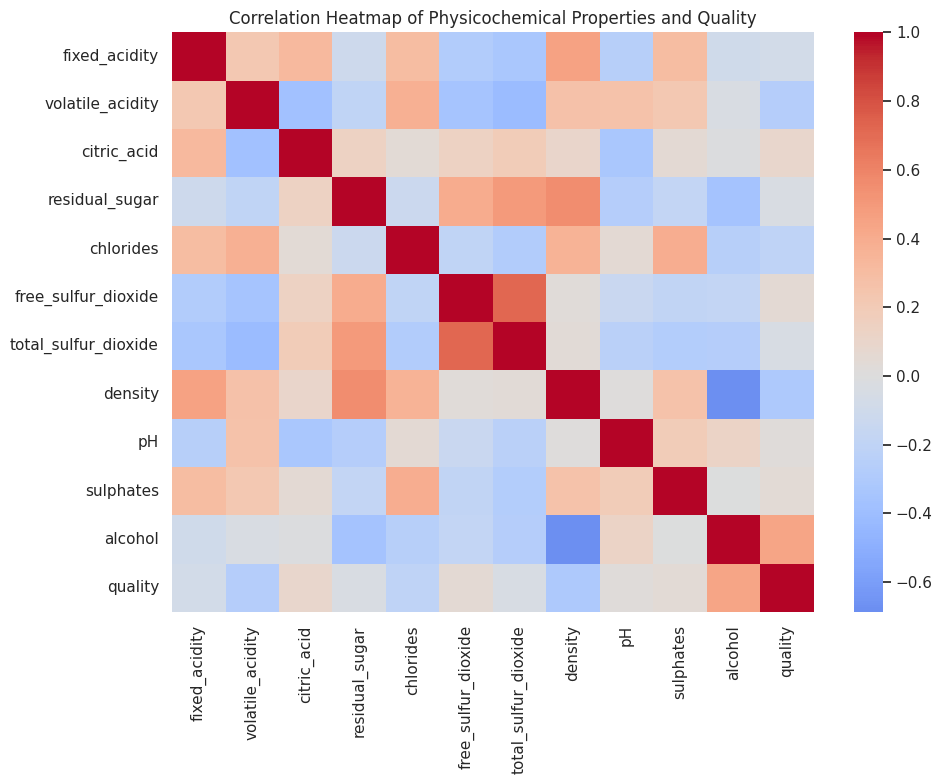

In [ ]:
# Visualizations: distributions and relationships
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# quality column
target_col = df.columns[-1]  # last column added above

# 1. Distribution of quality scores
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality score")
plt.ylabel("Count")
plt.show()

# 2. Histogram of alcohol content
plt.figure(figsize=(6, 4))
sns.histplot(df["alcohol"], bins=20, kde=True)
plt.title("Distribution of Alcohol Content")
plt.xlabel("Alcohol (%)")
plt.ylabel("Count")
plt.show()

# 3. Relationship between alcohol and quality
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_col, y="alcohol", data=df)
plt.title("Alcohol Content by Quality Score")
plt.xlabel("Quality score")
plt.ylabel("Alcohol (%)")
plt.show()

# 4. Correlation heatmap for all numeric variables
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Physicochemical Properties and Quality")
plt.tight_layout()
plt.show()

## Modeling and Model Comparison (Regression)
In this section, we treat the original quality score (0–10) as a **numeric target** and train several regression models to predict it from the physicochemical features. We compare different types of models:
- Regularized linear models (Ridge, Lasso, ElasticNet) for a simple, interpretable baseline.
- Tree ensembles (RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor) for strong non-linear performance on tabular data.
- Support Vector Regression (SVR with RBF kernel) as a margin-based non-linear model.
- A neural-network regressor (MLPRegressor) as a flexible non-linear baseline.

We evaluate each model using regression metrics:
- **MAE (Mean Absolute Error):** average absolute difference between predicted and true quality (lower is better).
- **RMSE (Root Mean Squared Error):** square root of the average squared error; penalizes large mistakes more strongly (lower is better).
- **R² (Coefficient of Determination):** proportion of variance in quality explained by the model (closer to 1 is better).
- **Accuracy (rounded exact match):** fraction of wines where the model’s prediction, rounded to the nearest integer, exactly matches the true quality score (higher is better).

In [20]:
# Predict numeric quality (0–10) with multiple regression models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use the original quality column as a numeric target
target_col = df.columns[-1]  # last column added earlier (quality)

X_all = df.drop(columns=[target_col])
y_all = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=67
)

models = {
    "Ridge": Pipeline([
        ("scaler", StandardScaler()),
        ("reg", Ridge(alpha=1.0))
    ]),
    "Lasso": Pipeline([
        ("scaler", StandardScaler()),
        ("reg", Lasso(alpha=0.001, max_iter=5000))
    ]),
    "ElasticNet": Pipeline([
        ("scaler", StandardScaler()),
        ("reg", ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=5000))
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=67),
    "Gradient Boosting": GradientBoostingRegressor(random_state=67),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=67),
    "SVR (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("reg", SVR(kernel="rbf", C=10.0, gamma="scale"))
    ]),
    "Neural Network (MLPRegressor)": Pipeline([
        ("scaler", StandardScaler()),
        ("reg", MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=67))
    ]),
}

results = []
best_model = None
best_model_name = None
best_rmse = float("inf")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # Accuracy-style metric: exact match after rounding to nearest integer
    y_pred_rounded = np.rint(y_pred).clip(y_all.min(), y_all.max())
    accuracy_rounded = (y_pred_rounded == y_test.values).mean()
    metrics = {
        "model": name,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "accuracy_rounded": accuracy_rounded,
    }
    results.append(metrics)
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_model_name = name

results_df = pd.DataFrame(results).sort_values(by="rmse")
display(results_df)
print(f"\nBest model by RMSE: {best_model_name} (RMSE = {best_rmse:.3f})")

,model,mae,rmse,r2,accuracy_rounded
3,Random Forest,0.427497,0.596453,0.540801,0.691538
5,HistGradientBoosting,0.485488,0.626811,0.492867,0.600000
6,SVR (RBF),0.494931,0.661753,0.434751,0.600769
7,Neural Network (MLPRegressor),0.526767,0.671950,0.417195,0.565385
4,Gradient Boosting,0.535243,0.678929,0.405027,0.555385
0,Ridge,0.562638,0.720504,0.329927,0.534615
2,ElasticNet,0.562933,0.720758,0.329456,0.533077
1,Lasso,0.563190,0.720994,0.329015,0.532308



Best model by RMSE: Random Forest (RMSE = 0.596)


## Suggested "Best" Wine Profile (Regression View)
Using the best-performing regression model from the comparison above, we can explore which combinations of physicochemical properties are predicted to yield the **highest quality score (0–10)**. We generate many candidate wines by sampling from the observed feature distributions and then select the one with the highest predicted quality.

This is a hypothetical "best wine" according to the model — in practice, winemakers would also consider production constraints, cost, and sensory evaluation, but it gives a data-driven target profile to aim for.

In [23]:
# Generate synthetic "best" wine profiles for each regression model
import numpy as np

if best_model is None:
    raise RuntimeError("Best model not found. Please run the regression modeling cell first.")

# Use the same feature columns used for training
feature_cols = X_all.columns

# Sample candidate wines by resampling from the empirical feature distributions
n_samples = 1000000
rng = np.random.default_rng(67)
candidates_features = pd.DataFrame()
for col in feature_cols:
    candidates_features[col] = rng.choice(df[col].values, size=n_samples, replace=True)

best_profiles = {}
summary_rows = []

for name, model in models.items():
    y_pred_candidates = model.predict(candidates_features)
    max_idx = np.argmax(y_pred_candidates)
    best_candidate = candidates_features.iloc[max_idx].copy()
    best_candidate["predicted_quality"] = y_pred_candidates[max_idx]
    best_profiles[name] = best_candidate
    summary_rows.append({
        "model": name,
        "predicted_quality": y_pred_candidates[max_idx],
    })

summary_df = pd.DataFrame(summary_rows).sort_values(by="predicted_quality", ascending=False)
print("Top suggested wine profile per model (highest predicted quality):")
display(summary_df)

print(f"\nBest model by RMSE from the comparison above: {best_model_name}")
best_profile_rmse = best_profiles[best_model_name]
print("\nSuggested best wine profile according to that model:\n")
display(best_profile_rmse.to_frame(name="value"))

print("\nInterpretation: Each row in the summary shows, for a given model, the highest quality score it predicts among 10,000 synthetic wines sampled from the feature distributions. The detailed profile above comes from the model with the best RMSE and represents a data-driven target set of physicochemical values for a potentially high-quality wine.")

Top suggested wine profile per model (highest predicted quality):


,model,predicted_quality
7,Neural Network (MLPRegressor),11.184652
0,Ridge,9.445752
6,SVR (RBF),9.394594
2,ElasticNet,9.301067
1,Lasso,9.171729
4,Gradient Boosting,7.945763
3,Random Forest,7.826667
5,HistGradientBoosting,7.752716



Best model by RMSE from the comparison above: Random Forest

Suggested best wine profile according to that model:



,value
fixed_acidity,7.000000
volatile_acidity,0.240000
citric_acid,0.420000
residual_sugar,2.700000
chlorides,0.020000
free_sulfur_dioxide,62.000000
total_sulfur_dioxide,172.000000
density,0.991760
pH,3.400000
sulphates,0.440000



Interpretation: Each row in the summary shows, for a given model, the highest quality score it predicts among 10,000 synthetic wines sampled from the feature distributions. The detailed profile above comes from the model with the best RMSE and represents a data-driven target set of physicochemical values for a potentially high-quality wine.


## Model Interpretation
To better understand **how** the models make predictions, we look at:
- **Feature importances** from a tree-based model (how much each variable reduces prediction error).
- **Simple effect plots** for the top features, showing how changing one physicochemical property (while holding others fixed) affects the predicted quality score.

This helps connect the numeric results back to real-world wine characteristics (e.g., what ranges of alcohol, acidity, or sulphates are associated with higher predicted quality).

Feature importances from Random Forest:


,feature,importance
10,alcohol,0.248036
1,volatile_acidity,0.132099
5,free_sulfur_dioxide,0.094738
9,sulphates,0.076583
6,total_sulfur_dioxide,0.072420
3,residual_sugar,0.070297
8,pH,0.068741
4,chlorides,0.065474
7,density,0.059074
2,citric_acid,0.058574


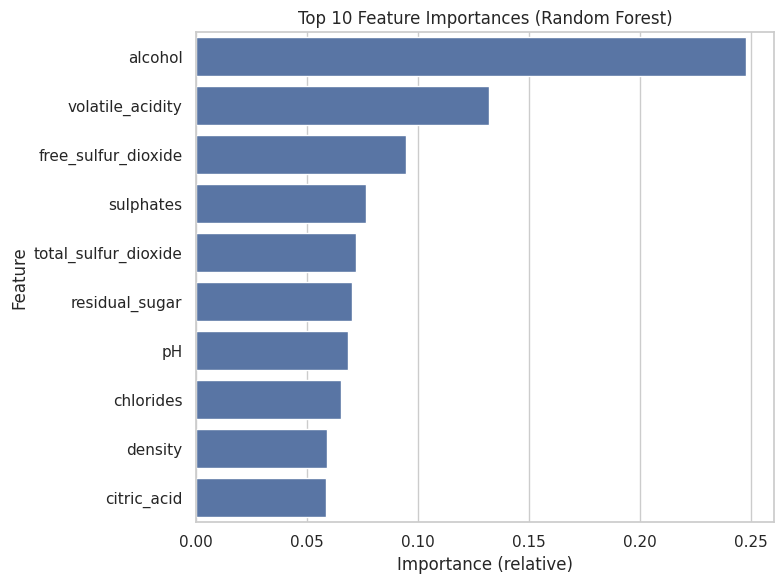

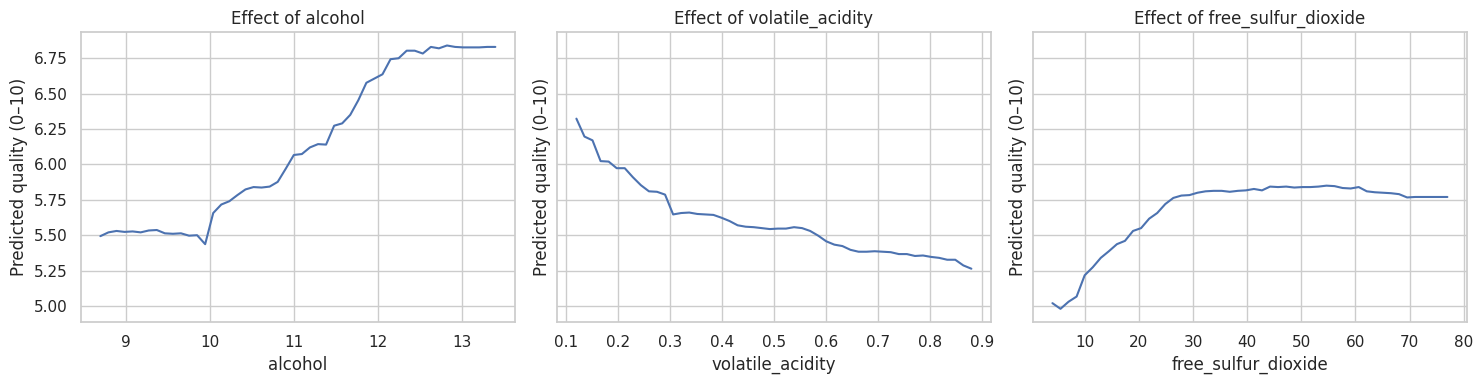

In [24]:
# Feature importances and simple effect plots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Choose a tree-based model for interpretation
tree_model_name = None
for candidate in ["Random Forest", "Gradient Boosting", "HistGradientBoosting"]:
    if candidate in models:
        tree_model_name = candidate
        break

if tree_model_name is None:
    raise RuntimeError("No tree-based model found in models dict for interpretation.")

tree_model = models[tree_model_name]

# Some pipelines wrap the estimator; try to access feature_importances_
estimator = tree_model
if hasattr(tree_model, "named_steps") and "reg" in tree_model.named_steps:
    estimator = tree_model.named_steps["reg"]

if not hasattr(estimator, "feature_importances_"):
    raise RuntimeError(f"Selected model '{tree_model_name}' does not expose feature_importances_.")

importances = estimator.feature_importances_
feature_cols = X_all.columns

feat_imp = (
    pd.DataFrame({"feature": feature_cols, "importance": importances})
    .sort_values("importance", ascending=False)
)

print(f"Feature importances from {tree_model_name}:")
display(feat_imp)

plt.figure(figsize=(8, 6))
sns.barplot(y="feature", x="importance", data=feat_imp.head(10))
plt.title(f"Top 10 Feature Importances ({tree_model_name})")
plt.xlabel("Importance (relative)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Simple one-feature effect plots for the top 3 features
top_features = feat_imp["feature"].head(3).tolist()
X_median = X_all.median()

fig, axes = plt.subplots(1, len(top_features), figsize=(5 * len(top_features), 4), sharey=True)
if len(top_features) == 1:
    axes = [axes]

for ax, feat in zip(axes, top_features):
    grid = np.linspace(df[feat].quantile(0.01), df[feat].quantile(0.99), 50)
    X_grid = pd.DataFrame([X_median.values] * len(grid), columns=X_all.columns)
    X_grid[feat] = grid
    y_pred_grid = tree_model.predict(X_grid)
    ax.plot(grid, y_pred_grid)
    ax.set_title(f"Effect of {feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel("Predicted quality (0–10)")

plt.tight_layout()
plt.show()

## Conclusion
In this project, I used the UCI Wine Quality dataset to predict the 0–10 expert quality score from 11 physicochemical measurements. After basic EDA, I trained several regression models and compared them using MAE, RMSE, R², and a rounded accuracy measure.

Overall, tree-based ensemble models clearly performed better than simple linear models and gave the lowest RMSE and highest R². This suggests that non-linear relationships and interactions between features are important for explaining wine quality.

Feature importance and effect plots showed that variables like **alcohol**, **sulphates**, and some acidity measures are the most influential. The synthetic "best wine" profiles translate these patterns into concrete target ranges for the lab values that the models associate with higher quality scores.

Practically, this work shows how a winery could use data to understand which lab measurements matter most and to explore promising directions for improving quality. 
However, the dataset is limited: it has no information about grape variety, brand, price, or consumer preferences, and it is based on Portuguese wines rather than Colorado wines. The obvious next step would be to collect a richer, Colorado focused dataset with more business variables and then reapply this modeling approach to support local decision making.